In [1]:
from settings import BASE_DIR
import pandas as pd
import seaborn as sns
import json

"""from importlib.machinery import SourceFileLoader
foo = SourceFileLoader("settings",
                       "C:\\Users\\biagi\\Desktop\\university\\Second Year\\First Semester\\advanced machine learning\\prog\\Advanced_Machine_Learning_Project\\settings.py").load_module()
from settings import BASE_DIR"""

df1 = pd.read_csv(
    "{BaseDir}/Advanced_Machine_Learning_Project/ML/RandomSearchModelsResult.csv".format(BaseDir=BASE_DIR)
)
#df2 = pd.read_csv(
#    "{BaseDir}/Advanced_Machine_Learning_Project/ML/ModelResultsAnna.csv".format(BaseDir=BASE_DIR)
#)

#df2[["Model", "Mean_fit_time", "Mean_score_time"]] = df2[["model", "mean_fit_time", "mean_score_time"]]
#df2 = df2.drop(["model", "mean_fit_time", "mean_score_time"], axis=1)

#frames = [df1, df2]
#df = pd.concat(frames)
df[["embedding", "Model"]] = df.Model.str.split('(TFIDF|W2V)', expand=True).drop(0,axis=1)

/home/annabelle/Documents


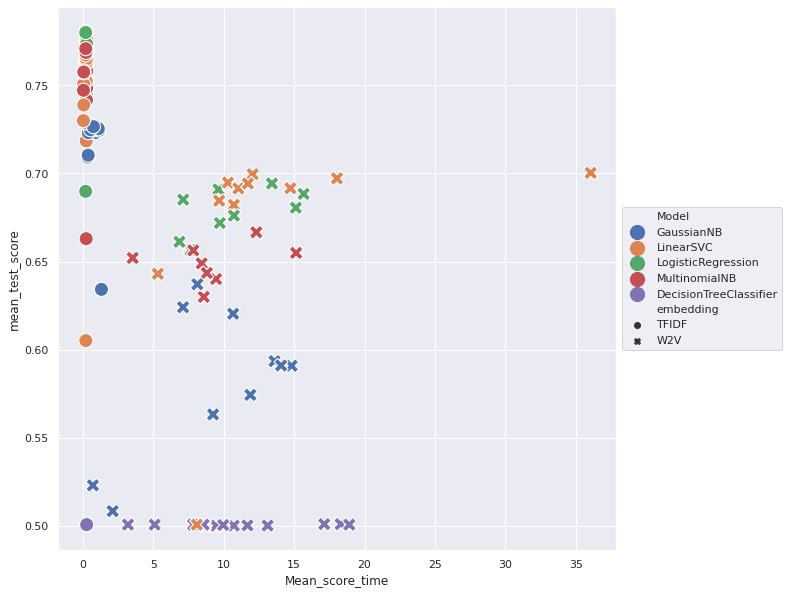

In [2]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='Mean_score_time',
    y='mean_test_score',
    size='Model',
    sizes=(200,200),
    data=df,
    hue='Model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

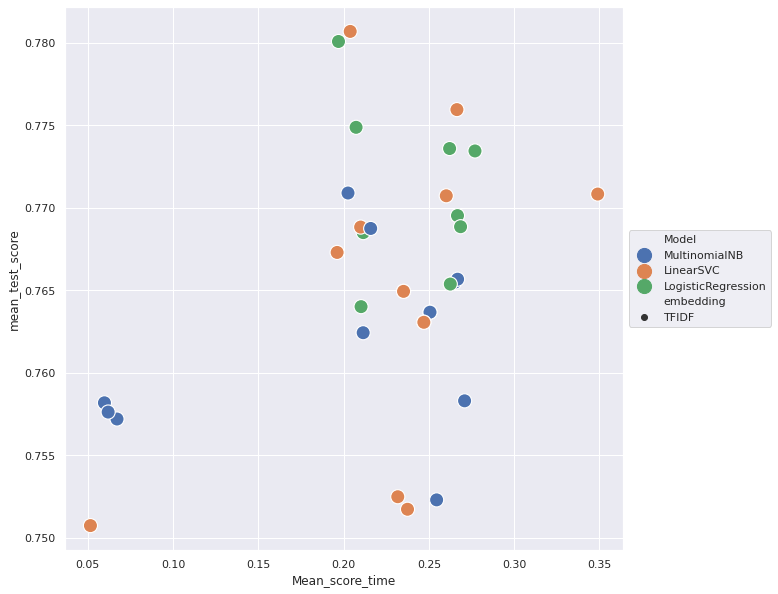

In [3]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='Mean_score_time',
    y='mean_test_score',
    size='Model',
    sizes=(200,200),
    data=df.query('mean_test_score > 0.75'),
    hue='Model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

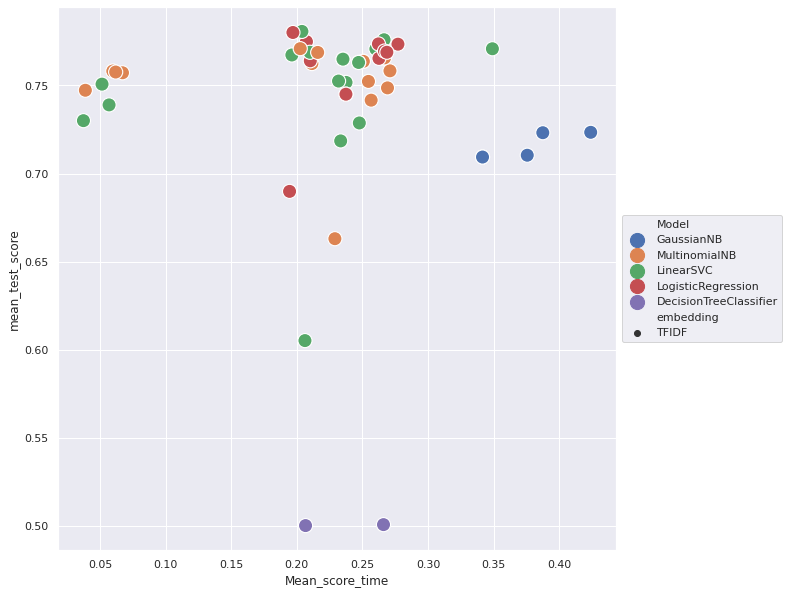

In [4]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='Mean_score_time',
    y='mean_test_score',
    size='Model',
    sizes=(200,200),
    data=df.query('Mean_score_time < 0.5'),
    hue='Model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

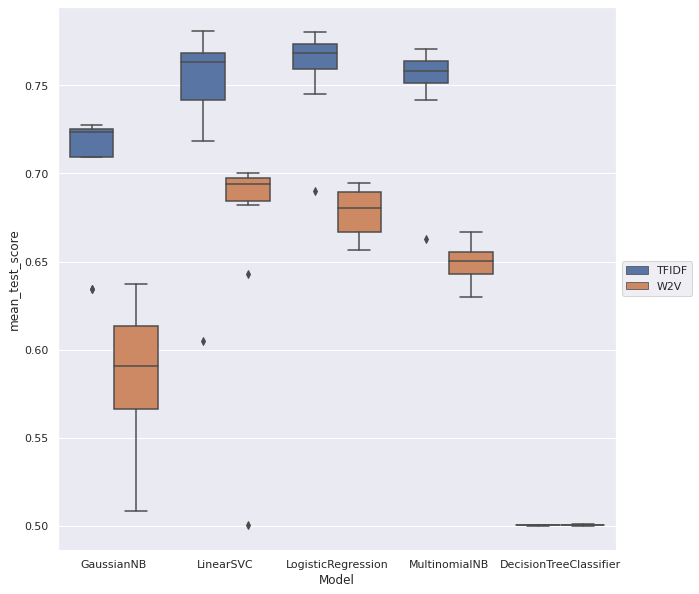

In [5]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.boxplot(x='Model', y='mean_test_score', data=df, hue='embedding')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

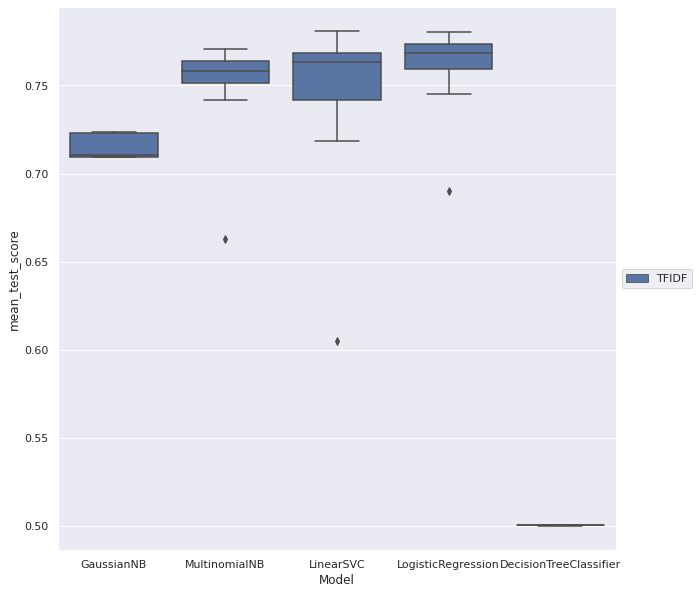

In [6]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.boxplot(x='Model', y='mean_test_score', data=df.query('Mean_score_time < 0.5'), hue='embedding')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [33]:
df.query("Model == 'MultinomialNB' and embedding == 'TFIDF'")[["Mean_score_time", "mean_test_score"]]

,Mean_score_time,mean_test_score
3,0.250669,0.763663
7,0.250669,0.763663
12,0.270958,0.758295
21,0.211476,0.762421
41,0.228996,0.662989
46,0.265138,0.765474
53,0.266853,0.765663
55,0.254560,0.752295
58,0.269085,0.748611
60,0.256623,0.741642


In [49]:
json.load(open("{BaseDir}/Advanced_Machine_Learning_Project/ML/ModelParamsAnna.json".format(BaseDir=BASE_DIR)),)

JSONDecodeError: Extra data: line 13 column 2 (char 350)

In [99]:
def load_configs(interested_model):
    x = open("{BaseDir}/Advanced_Machine_Learning_Project/ML/RandomSearchModelParams.json".format(BaseDir=BASE_DIR), 'r').read().replace("\n","").replace("\t"," ").split('}',)
    x = [y+'}' for y in x]
    jsons = [json.loads(y) for y in x[:-1]]
    if interested_model != None:
        jsons = [json for json in jsons if json["model"] == interested_model]
    return jsons

In [100]:
load_configs("TFIDFLinearSVC")

[{'model': 'W2VLinearSVC',
  'model__C': 2.0642942322783613,
  'model__dual': False,
  'model__epochs': 25,
  'model__intercept_scaling': 8.253081764199006,
  'model__max_iter': 1926,
  'model__min_count': 3,
  'model__penalty': 'l1',
  'model__tol': 0.0004538475200713612,
  'model__vector_size': 7403,
  'model__window': 5},
 {'model': 'W2VLinearSVC',
  'model__C': 1.3466388803982898,
  'model__dual': False,
  'model__epochs': 18,
  'model__intercept_scaling': 8.597002501123532,
  'model__max_iter': 416,
  'model__min_count': 10,
  'model__penalty': 'l2',
  'model__tol': 0.0008954165672384203,
  'model__vector_size': 6266,
  'model__window': 9},
 {'model': 'W2VLinearSVC',
  'model__C': 0.14525864368038902,
  'model__dual': False,
  'model__epochs': 6,
  'model__intercept_scaling': 3.937864706179297,
  'model__max_iter': 468,
  'model__min_count': 10,
  'model__penalty': 'l1',
  'model__tol': 0.0006879027362195966,
  'model__vector_size': 8478,
  'model__window': 1}]

[{'model': 'W2VLinearSVC',
  'model__C': 2.0642942322783613,
  'model__dual': False,
  'model__epochs': 25,
  'model__intercept_scaling': 8.253081764199006,
  'model__max_iter': 1926,
  'model__min_count': 3,
  'model__penalty': 'l1',
  'model__tol': 0.0004538475200713612,
  'model__vector_size': 7403,
  'model__window': 5},
 {'model': 'W2VLinearSVC',
  'model__C': 1.3466388803982898,
  'model__dual': False,
  'model__epochs': 18,
  'model__intercept_scaling': 8.597002501123532,
  'model__max_iter': 416,
  'model__min_count': 10,
  'model__penalty': 'l2',
  'model__tol': 0.0008954165672384203,
  'model__vector_size': 6266,
  'model__window': 9},
 {'model': 'W2VLinearSVC',
  'model__C': 0.14525864368038902,
  'model__dual': False,
  'model__epochs': 6,
  'model__intercept_scaling': 3.937864706179297,
  'model__max_iter': 468,
  'model__min_count': 10,
  'model__penalty': 'l1',
  'model__tol': 0.0006879027362195966,
  'model__vector_size': 8478,
  'model__window': 1}]